In [5]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
import matplotlib as mpl
import seaborn as sns
import string
from scipy.spatial import distance_matrix
from scipy.spatial.distance import euclidean
import os

## SciPy 数学运算

◄ scipy.cluster.vq.kmeans() k 均值聚类
◄ scipy.constants.pi 圆周率
◄ scipy.constants.golden 黄金分割比
◄ scipy.constants.c 真空中光速
◄ scipy.fft.fft() 一维傅里叶变换
◄ scipy.integrate.quad() 定积分
◄ scipy.interpolate.interp1d() 一元插值
◄ scipy.interpolate.griddata()在不规则数据点上进行数据插值
◄ scipy.io.loadmat() 导入 MATLAB 文件
◄ scipy.io.savemat() 保存 MATLAB 文件
◄ scipy.linalg.inv() 矩阵逆
◄ scipy.linalg.det() 行列式
◄ scipy.linalg.pinv() Moore-Penrose 伪逆
◄ scipy.linalg.eig() EVD 特征值分解
◄ scipy.linalg.cholesky() Cholesky 分解
◄ scipy.linalg.qr() QR 分解
◄ scipy.linalg.svd() SVD 奇异值分解
◄ scipy.ndimage.gaussian_filter() 高斯滤波
◄ scipy.ndimage.convolve() 多维卷积
◄ scipy.optimize.root() 求根
◄ scipy.optimize.minimize() 最小化
◄ scipy.signal.convolve() 卷积
◄ scipy.sparse.linalg.inv() 稀疏矩阵的逆
◄ scipy.sparse.linalg.norm() 稀疏矩阵范数
◄ scipy.spatial.distance.euclidean() 欧氏距离
◄ scipy.spatial.distance_matrix() 距离矩阵
◄ scipy.special.factorial() 阶乘
◄ scipy.special.gamma() Gamma 函数
◄ scipy.special.beta() Beta 函数
◄ scipy.special.erf() 误差函数
◄ scipy.special.comb() 组合数
◄ scipy.stats.norm() 一元高斯分布
◄ scipy.stats.multivariate_normal() 多元高斯分布
◄ scipy.stats.gaussian_kde() 高斯核密度估计

### 1 什么是 SciPy？

数据预处理和特征工程 优化问题 数值计算 统计分析 信号处理

### 2 距离

In [6]:
euclidean([8, 8], [2, 0])

10.0

C:\Users\ghdong\AppData\Local\Temp\ipykernel_22160\3908017218.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('RdYlBu_r')


[5 0] [3 3]
5 3
[5 0] [7 9]
5 7
[5 0] [3 5]
5 3
[5 0] [2 4]
5 2
[5 0] [7 6]
5 7
[5 0] [8 8]
5 8
[5 0] [10  1]
5 10
[5 0] [6 7]
5 6
[5 0] [7 8]
5 7
[5 0] [1 5]
5 1
[5 0] [9 8]
5 9
[5 0] [9 4]
5 9
[5 0] [3 0]
5 3
[5 0] [3 5]
5 3
[5 0] [0 2]
5 0
[5 0] [3 8]
5 3
[5 0] [1 3]
5 1
[5 0] [3 3]
5 3
[5 0] [7 0]
5 7
[5 0] [1 9]
5 1
[5 0] [9 0]
5 9
[5 0] [10  4]
5 10
[5 0] [7 3]
5 7
[5 0] [2 7]
5 2
[5 0] [2 0]
5 2
[3 3] [7 9]
3 7
[3 3] [3 5]
3 3
[3 3] [2 4]
3 2
[3 3] [7 6]
3 7
[3 3] [8 8]
3 8
[3 3] [10  1]
3 10
[3 3] [6 7]
3 6
[3 3] [7 8]
3 7
[3 3] [1 5]
3 1
[3 3] [9 8]
3 9
[3 3] [9 4]
3 9
[3 3] [3 0]
3 3
[3 3] [3 5]
3 3
[3 3] [0 2]
3 0
[3 3] [3 8]
3 3
[3 3] [1 3]
3 1
[3 3] [3 3]
3 3
[3 3] [7 0]
3 7
[3 3] [1 9]
3 1
[3 3] [9 0]
3 9
[3 3] [10  4]
3 10
[3 3] [7 3]
3 7
[3 3] [2 7]
3 2
[3 3] [2 0]
3 2
[7 9] [3 5]
7 3
[7 9] [2 4]
7 2
[7 9] [7 6]
7 7
[7 9] [8 8]
7 8
[7 9] [10  1]
7 10
[7 9] [6 7]
7 6
[7 9] [7 8]
7 7
[7 9] [1 5]
7 1
[7 9] [9 8]
7 9
[7 9] [9 4]
7 9
[7 9] [3 0]
7 3
[7 9] [3 5]
7 3
[7 9] [0 

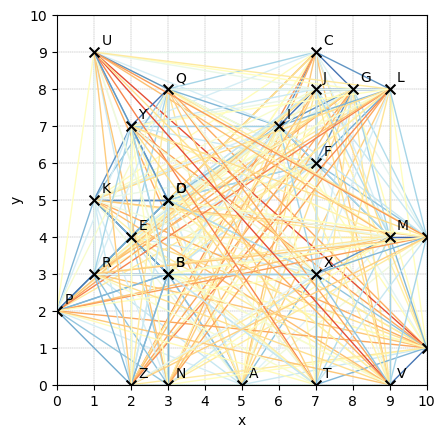

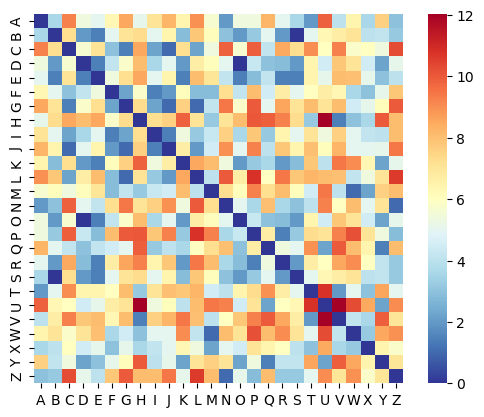

In [25]:
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")
# 产生随机数
num = 26
np.random.seed(0)
data = np.random.randint(10 + 1, size=(num, 2))
labels = list(string.ascii_uppercase)  # string.ascii_uppercase 包含所有大写字母
cmap = mpl.cm.get_cmap('RdYlBu_r')
fig, ax = plt.subplots()
# 绘制成对线段

# itertools.combinations 用于生成一个可迭代对象，该对象包含给定可迭代对象中所有指定长度的组合
for i, d in enumerate(itertools.combinations(data, 2)):
    d_idx = euclidean(d[0], d[1])  # scipy.spatial.distance.euclidean() 计算两个点之间的欧氏距离
    print(d[0], d[1])
    print(d[0][0], d[1][0])
    plt.plot([d[0][0], d[1][0]],
             [d[0][1], d[1][1]],  # 绘制线段
             color=cmap(d_idx / np.sqrt(2) / 10), lw=1)  # 将距离映射到 0 ~ 1 之间
ax.scatter(data[:, 0], data[:, 1],
           marker='x', color='k', s=50, zorder=100)
# 添加标签
for i, txt in enumerate(labels):
    ax.annotate(txt, (data[i, 0] + 0.2, data[i, 1] + 0.2))  # 添加字母标签

ax.set_xlim(0, 10);
ax.set_ylim(0, 10)
ax.set_xticks(np.arange(11))
ax.set_yticks(np.arange(11))
plt.xlabel('x');
plt.ylabel('y')
ax.grid(ls='--', lw=0.25, color=[0.5, 0.5, 0.5])
ax.set_aspect('equal', adjustable='box')
fig.savefig('Figures/成对距离连线.svg', format='svg')
# 计算成对距离矩阵
pairwise_distances = distance_matrix(data, data)
# 它接受点坐标的数组或列表，然后计算每两个点之间的距离，并返回一个矩阵，其中的每个元素表示两个点之间的距离。
fig, ax = plt.subplots()
sns.heatmap(pairwise_distances,
            cmap='RdYlBu_r', square=True,
            xticklabels=labels, yticklabels=labels,
            ax=ax)
fig.savefig('Figures/成对距离矩阵热图.svg', format='svg')

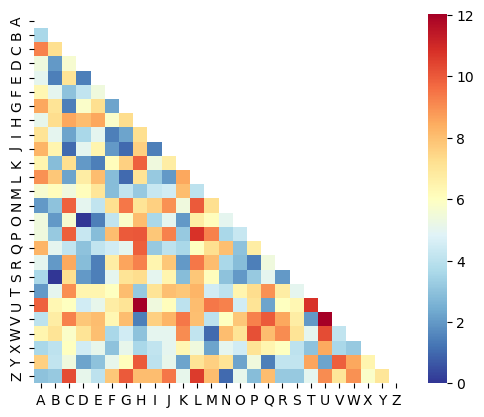

In [27]:
# 计算成对距离矩阵
pairwise_ds = distance_matrix(data, data)
# 产生蒙皮 / 面具
mask = np.triu(np.ones_like(pairwise_ds, dtype=bool))  # numpy.triu() 生成一个上三角函数
fig, ax = plt.subplots()
sns.heatmap(pairwise_ds,
            mask=mask,  # mask 中对应位置为 True 的单元格的成对距离矩阵数据将不会被显示
            cmap='RdYlBu_r',
            square=True,
            xticklabels=labels,
            yticklabels=labels,
            ax=ax)
fig.savefig('Figures/下三角.svg', format='svg')

### 3 插值

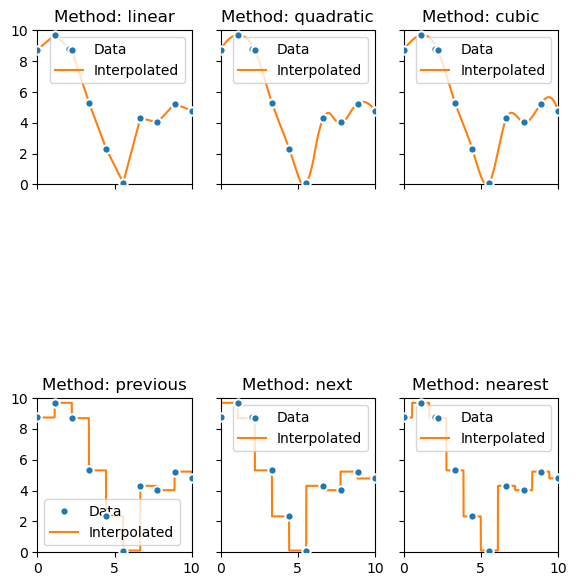

In [28]:
from scipy.interpolate import interp1d

# 生成随数据
np.random.seed(8)
x = np.linspace(0, 10, 10)
y = np.random.rand(10) * 10
x_fine = np.linspace(0, 10, 1001)
# 创建一个图形对象，包含六个子图
fig, axes = plt.subplots(2, 3, figsize=(6, 9),
                         sharex='col',
                         sharey='row')
axes = axes.flatten()  # flatten() 将多维数组转换为一维数组
# 六种插值方法
methods = ['linear', 'quadratic', 'cubic',
           'previous', 'next', 'nearest']
for i, method in enumerate(methods):
    # 创建 interp1d 对象
    f = interp1d(x, y, kind=method)  # interp1d 进行一维插值

    # 生成插值后的新数据点
    y_fine = f(x_fine)

    # 绘制子图
    axes[i].plot(x, y, 'o', label='Data',
                 markeredgewidth=1.5,
                 markeredgecolor='w',
                 zorder=100)
    axes[i].plot(x_fine, y_fine, label='Interpolated')
    axes[i].set_title(f'Method: {method}')
    axes[i].legend()
    axes[i].set_xlim(0, 10)
    axes[i].set_ylim(0, 10)
    axes[i].set_aspect('equal', adjustable='box')
plt.tight_layout()
fig.savefig('Figures/不同插值方法.svg', format='svg')

### 4 高斯分布
scipy.stats.norm.pdf(x, loc, scale)
x 为需要计算概率密度的数值，可以是一个数值或一个数组。
loc 为正态分布的均值，loc 是 location 的简写。
scale 代表正态分布的标准差。

Text(0, 0.5, 'PDF, $f_X(x)$')

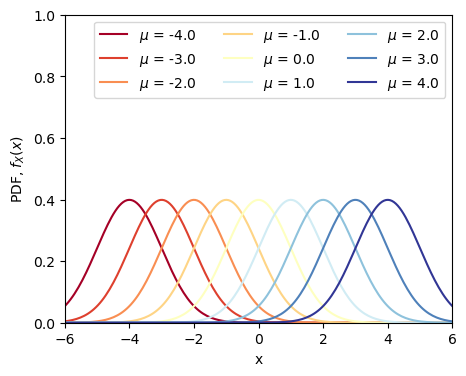

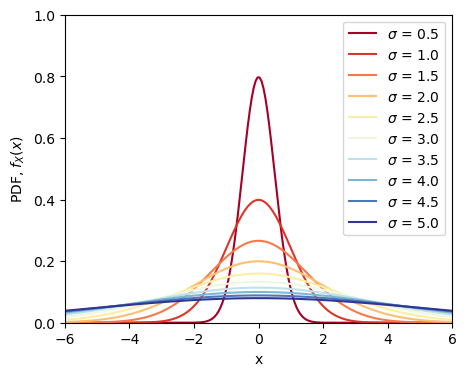

In [29]:
# 一元高斯函数
from matplotlib import cm
from scipy.stats import norm

x_array = np.linspace(-6, 6, 200)
mu_array = np.linspace(-4, 4, 9)
# 设定均值一系列取值
colors = cm.RdYlBu(np.linspace(0, 1, len(mu_array)))
# 均值对一元高斯分布PDF影响
fig, ax = plt.subplots(figsize=(5, 4))
for idx, mu_idx in enumerate(mu_array):
    pdf_idx = norm.pdf(x_array, scale=1, loc=mu_idx)
    legend_idx = '$\mu$ = ' + str(mu_idx)
    plt.plot(x_array, pdf_idx,
             color=colors[idx],
             label=legend_idx)
plt.legend(ncol=3)
ax.set_xlim(x_array.min(), x_array.max())
ax.set_ylim(0, 1)
ax.set_xlabel('x')
ax.set_ylabel('PDF, $f_X(x)$')

sigma_array = np.linspace(0.5, 5, 10)
# 设定标准差一系列取值
colors = cm.RdYlBu(np.linspace(0, 1, len(sigma_array)))
# 标准差对一元高斯分布PDF影响
fig, ax = plt.subplots(figsize=(5, 4))
for idx, sigma_idx in enumerate(sigma_array):
    pdf_idx = norm.pdf(x_array, scale=sigma_idx)
    legend_idx = '$\sigma$ = ' + str(sigma_idx)
    plt.plot(x_array, pdf_idx,
             color=colors[idx],
             label=legend_idx)
plt.legend()
ax.set_xlim(x_array.min(), x_array.max())
ax.set_ylim(0, 1)
ax.set_xlabel('x')
ax.set_ylabel('PDF, $f_X(x)$')

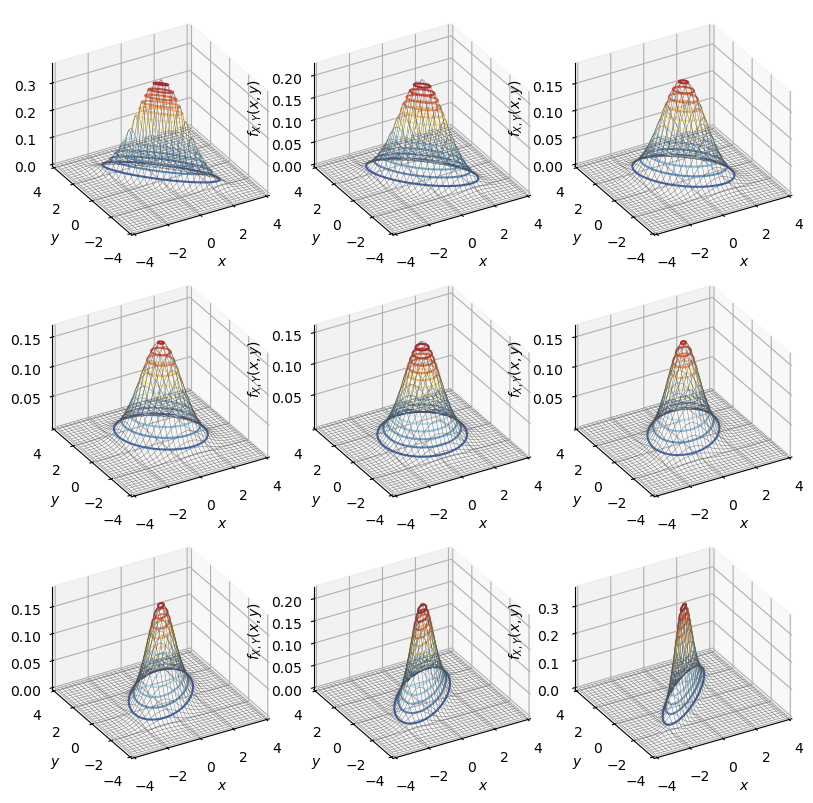

In [41]:
# 二元高斯分布
from scipy.stats import multivariate_normal

rho_array = [-0.9, -0.7, -0.5, -0.3,
             0, 0.3, 0.5, 0.7, 0.9]
sigma_X = 1;
sigma_Y = 1  # 标准差
mu_X = 0;
mu_Y = 0  # 期望
width = 4
X = np.linspace(-width, width, 321)
Y = np.linspace(-width, width, 321)
XX, YY = np.meshgrid(X, Y) # 生成横纵坐标
XXYY = np.dstack((XX, YY)) # dstack() 沿着第三根轴拼接 拼接成三维坐标 新增加一个维度，在该维度方向上拼接
# 曲面
fig = plt.figure(figsize=(8, 8))
for idx, rho_idx in enumerate(rho_array):
    # 质心
    mu = [mu_X, mu_Y]
    # 协方差
    Sigma = [[sigma_X ** 2, sigma_X * sigma_Y * rho_idx],
             [sigma_X * sigma_Y * rho_idx, sigma_Y ** 2]]
    # 二元高斯分布
    bi_norm = multivariate_normal(mu, Sigma)
    f_X_Y_joint = bi_norm.pdf(XXYY)

    ax = fig.add_subplot(3, 3, idx + 1, projection='3d')
    ax.plot_wireframe(XX, YY, f_X_Y_joint,
                      rstride=10, cstride=10,
                      color=[0.3, 0.3, 0.3],
                      linewidth=0.25)
    ax.contour(XX, YY, f_X_Y_joint, 15,
               cmap='RdYlBu_r')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$f_{X,Y}(x'
                  ''
                  ''
                  ',y)$')
    ax.view_init(azim=-120, elev=30)
    ax.set_proj_type('ortho')
    ax.set_xlim(-width, width)
    ax.set_ylim(-width, width)
    ax.set_zlim(f_X_Y_joint.min(), f_X_Y_joint.max())
    # ax.axis('off')

plt.tight_layout()
fig.savefig('Figures/二元高斯分布，曲面.svg', format='svg')
plt.show()

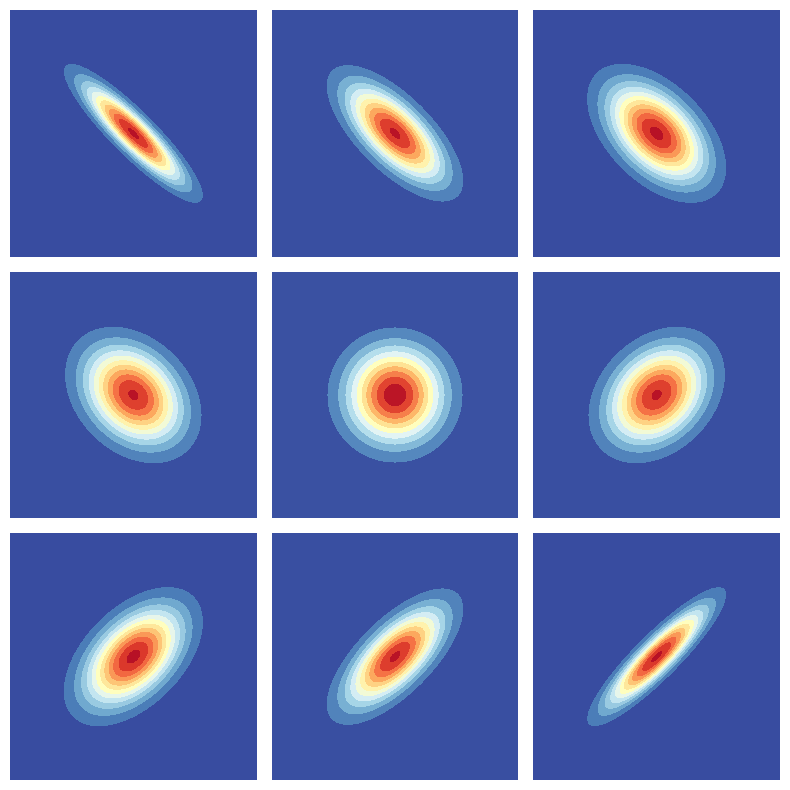

In [38]:
fig = plt.figure(figsize=(8, 8))
for idx, rho_idx in enumerate(rho_array):
    mu = [mu_X, mu_Y]
    Sigma = [[sigma_X ** 2, sigma_X * sigma_Y * rho_idx],
             [sigma_X * sigma_Y * rho_idx, sigma_Y ** 2]]
    bi_norm = multivariate_normal(mu, Sigma)
    f_X_Y_joint = bi_norm.pdf(XXYY)

    ax = fig.add_subplot(3, 3, idx + 1)
    ax.contourf(XX, YY, f_X_Y_joint,
                levels=12, cmap='RdYlBu_r')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_xlim(-width, width)
    ax.set_ylim(-width, width)
    ax.axis('off')

plt.tight_layout()
fig.savefig('Figures/二元高斯分布，等高线.svg', format='svg')
plt.show()


In [42]:
XX.shape

(321, 321)

In [43]:
YY.shape

(321, 321)

In [44]:
XXYY.shape

(321, 321, 2)